# Numerical solution of differential equations

In this project, we apply numerical techniques to find an approximation of the solution of an initial value problem. It is ok to discuss with your classmates or to google, but <b>don't copy any line of the code</b>. If I notice any identical part of codes, I am going to give 0 credit for all of them.

Return your worksheet by the end of May 2nd (Thursday). Please change the file name as <b>your last name - final project.ipynb</b>

The <b>logistic equation</b>, originally due to Pierre-François Verhulst in 1838, is the differential equation describing the population growth under the limited resources. Suppose that the environment has a carrying capacity (the maximum population size that the environment can sustain indefinitely) $K$. Let $P(t)$ be the population of a species at time $t$. Then the logistic equation is given by
$$\frac{dP}{dt} = rP\left(1-\frac{P}{K}\right),$$
where $r$ is a constant (initial growth ratio). 

This is one of first-order differential equations that could be solved analytically, and the general solution is 
$$P(t) = \frac{KP_0e^{rt}}{K + P_0(e^{rt}-1)}.$$

#### 1. (10 pts) For this problem, let $K = 12$, $r = 0.43$, and $P_0 = P(0) = 1$. Construct a function Euler(h, N) that calculates an approximation $p_h(t_n)$ of $P(t_n)$ for $1 \le n \le N$ by using Euler's method where $t_n = hn$.

In [12]:
import math 
import numpy as np


# h: step size
# n-N: interval of points 
# tn = hn = xth point at which to estimate P(x)

K = 12 
r = 0.43

def Euler(h,N):
    x0 = 0
    y0 = 1
    Xn = np.arange(x0,N,h)
    size = len(Xn)
    Yn = np.zeros(size)
    
    Yn[0] = y0
    for i in range(1,size):
        Yn[i] = Yn[i-1] + (h * (r*Yn[i-1] *(1 - (Yn[i-1]/ K))))
    
    print("(tn , P(tn))")
    for i in range(size):
        print("(",Xn[i],",", Yn[i],")")
    return 

def main():
    h = 0.1
    N = 3
    Euler(h,N)
    
main()

(tn , P(tn))
( 0.0 , 1.0 )
( 0.1 , 1.0394166666666667 )
( 0.2 , 1.0802401965584492 )
( 0.30000000000000004 , 1.1225090656823618 )
( 0.4 , 1.1662618601809382 )
( 0.5 , 1.2115371893987148 )
( 0.6000000000000001 , 1.258373591748215 )
( 0.7000000000000001 , 1.306809433181255 )
( 0.8 , 1.3568827981022142 )
( 0.9 , 1.408631372596044 )
( 1.0 , 1.4620923198855023 )
( 1.1 , 1.517302147979718 )
( 1.2000000000000002 , 1.5742965695299003 )
( 1.3 , 1.6331103539680323 )
( 1.4000000000000001 , 1.6937771720708064 )
( 1.5 , 1.7563294331639334 )
( 1.6 , 1.8207981152612065 )
( 1.7000000000000002 , 1.8872125885181745 )
( 1.8 , 1.9556004324716858 )
( 1.9000000000000001 , 2.025987247633486 )
( 2.0 , 2.098396462107921 )
( 2.1 , 2.1728491340098914 )
( 2.2 , 2.2493637505686332 )
( 2.3000000000000003 , 2.327956024914584 )
( 2.4000000000000004 , 2.408638691659307 )
( 2.5 , 2.4914213024907235 )
( 2.6 , 2.576310023116183 )
( 2.7 , 2.663307432992347 )
( 2.8000000000000003 , 2.7524123293815856 )
( 2.9000000000000004

#### 2. (10 pts) Sketch the graph of $P(t)$ and the approximations $p_h(t_n)$ with $h = 1, 0.5, 0.1$ for the time interval $[0, 30]$ on the same plane. Which $h$ value does provide a better approximation?

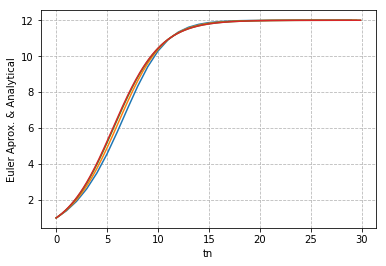

As we can see in the last sketch, the value h = 0.1 provides the best approximation


In [19]:
import matplotlib.pyplot as plt
import numpy as np

K = 12 
r = 0.43
P0 = 1

def logistics(t):
    return (K * P0 * np.exp(r*t))/ (K + P0 *(np.exp(r*t))-1)


def Euler(h,N):
    for j in h:
        x0 = 0
        y0 = 1
        Xn = np.arange(x0,N,j)
        size = len(Xn)
        Yn = np.zeros(size)
        Yn[0] = y0
        for i in range(1,size):
            Yn[i] = Yn[i-1] + (j * (r*Yn[i-1] *(1 - (Yn[i-1]/ K))))
        plt.plot(Xn,Yn)

    plt.grid(alpha=.9,linestyle='--')
    plt.xlabel("tn")
    plt.ylabel("Euler Aprox. & Analytical")
    x = np.arange(x0,30,0.1)
    y = logistics(x)
    plt.plot(x,y)
    
    plt.show()
    return 

def main():
    N = 30
    h = np.array([1.0,0.5,0.1])
    Euler(h,N)
    print("As we can see in the last sketch, the value h = 0.1 provides the best approximation")
main()

#### 3. (10 pts) For many mathematical models, the carrying capacity $K$ is <i>not</i> a constant. A particularly important special case is that $K$ is <i>periodic</i>, because in many situation the carrying capacity depends on the temperature and the change of temperature is nearly periodic (with a year as a period). From now on, let $K(t) = 12 + 2.5\sin(\frac{t}{12})$. (Then the exact solution formula for $P(t)$ is not valid anymore.) Use the same $r$ and $P(0)$. Construct a function Euler2(h, N) that calculates an approximation $p_h(t_n)$ of $P(t_n)$ for $1 \le n \le N$ by using Euler's method where $t_n = hn$.

In [14]:
import math 
import numpy as np

r = 0.43

def capacity(t):
    return (12 + (2.5 * np.sin(t/12)))

def Euler2(h,N):
    x0 = 0
    y0 = 1
    Xn = np.arange(x0,N,h)
    size = len(Xn)
    Yn = np.zeros(size)
    
    Yn[0] = y0
    for i in range(1,size):
        Yn[i] = Yn[i-1] + (h * (r*Yn[i-1] *(1 - (Yn[i-1]/ capacity(Xn[i-1])))))
    
    print("(tn , P(tn))")
    for i in range(size):
        print("(",Xn[i],",", Yn[i],")")
    return 

def main():
    h = 0.1
    N = 3
    Euler2(h,N)
main()

(tn , P(tn))
( 0.0 , 1.0 )
( 0.1 , 1.0394166666666667 )
( 0.2 , 1.0802469059900695 )
( 0.30000000000000004 , 1.1225304799064315 )
( 0.4 , 1.166307415689701 )
( 0.5 , 1.2116179327841574 )
( 0.6000000000000001 , 1.25850236322701 )
( 0.7000000000000001 , 1.3070010654614466 )
( 0.8 , 1.3571543313628687 )
( 0.9 , 1.4090022863274714 )
( 1.0 , 1.4625847823031282 )
( 1.1 , 1.5179412836779778 )
( 1.2000000000000002 , 1.5751107459823945 )
( 1.3 , 1.6341314874053228 )
( 1.4000000000000001 , 1.6950410531764144 )
( 1.5 , 1.757876072921107 )
( 1.6 , 1.8226721111567261 )
( 1.7000000000000002 , 1.8894635111638596 )
( 1.8 , 1.9582832325384674 )
( 1.9000000000000001 , 2.0291626828062723 )
( 2.0 , 2.1021315435615553 )
( 2.1 , 2.1772175916771483 )
( 2.2 , 2.2544465162206038 )
( 2.3000000000000003 , 2.3338417318025475 )
( 2.4000000000000004 , 2.415424189176267 )
( 2.5 , 2.4992121840017205 )
( 2.6 , 2.5852211647812684 )
( 2.7 , 2.6734635410673238 )
( 2.8000000000000003 , 2.763948493132452 )
( 2.900000000000

#### 4. (10 pts) Plot $p_h(t_n)$ with $h = 1, 0.5, 0.1$ for the time interval $[0, 100]$ on the same plane.

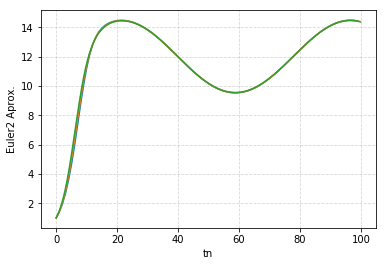

In [15]:
import matplotlib.pyplot as plt
import numpy as np
r = 0.43

def capacity(t):
    return (12 + (2.5 * np.sin(t/12)))

def Euler2(h,N):
    
    for j in h:
        x0 = 0
        y0 = 1
        Xn = np.arange(x0,N,j)
        size = len(Xn)
        Yn = np.zeros(size)
        K = capacity(Xn)
    
        Yn[0] = y0
        for i in range(1,size):
            Yn[i] = Yn[i-1] + (j * (r*Yn[i-1] *(1 - (Yn[i-1]/ K[i-1]))))
        
        plt.grid(alpha=0.5,linestyle='--')
        plt.xlabel("tn")
        plt.ylabel("Euler2 Aprox.")
        plt.plot(Xn,Yn)
    plt.show()
    return 

def main():
    N = 100
    h = np.array([1,0.5,0.1])
    Euler2(h,N)
main()

#### 5. (20 pts) Write a short essay (three paragraphs) on the following topic. Grading is based on completion. Don't need to write with a fancy style. Just explain your thought. 

What were <b>three</b> of the most important discoveries or realizations you made in this class? In other words, what are you taking away from this class that you think might stick with you over time and/or influence you in the future? What have you experienced that might have a long-term effect on you intellectually or personally? These can include things you had not realized about mathematics or society, specific homework problems or theorems from the textbook, etc. These can be things that made sense to you, or topics where you were confused, issues that arose while working on your assignments, etc. Explain why these three discoveries or realizations are important to you.

Taking this course as a combined mathematics and computer science major was definitely a valuable experience that I was longing to have. Amongst many factors this course finally created the bridge between tools brought by computer science and the many problems I learned about in other math courses and gave me the opportunity to understand them at their most intrinsic level. From theorems that are easily overlooked in introductory calculus such as the IVT and MVT and the numerical computation of integrals that we were able to revisit in great depth, to the newer methods such as root finding methods and interpolation. 

The three most important takeaways I have from this class are the usage of coding in applied mathematics in the real world, the realization of how computing power isn’t as important as the need for optimal methods to compute effective solutions, and lastly the importance of error analysis in understanding the cost and accuracy of our methods. Interpolation and the different applications we practiced in or projects was very interesting. The idea of having a set of data points and being able to construct a function that is simpler by sampling data points and interpolating them using a simpler function. 

The many methods of root-finding and figuring out the most optimal method for any given function as we did in our first project was also a very interesting task that led to a lot of research and contemplation as to figuring out which method was the most optimal. After two long nights my group and I were able to figure out case by case method that implemented the fastest converging root-finding algorithm based off the characteristics of the given function. All of these things are important to me because I was able to contribute heavily into the working of these methods and see how fascinating it is to be able to apply coding and mathematics to automate processes with such precision and accuracy with the use of computing. Something I would like to do next is see how the most optimal methods for interpolation, root finding, and solving a system of linear equations fairs against multi-threading. 